In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0] * 2
fig_size[1] = fig_size[1] * 2

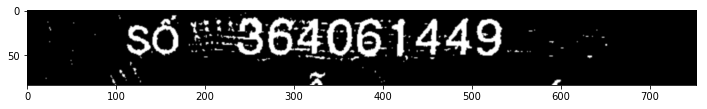

In [4]:
img = cv2.imread('test_cropping.png', 0)
_, thresh = cv2.threshold(img, 127, 255, 0)
plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')

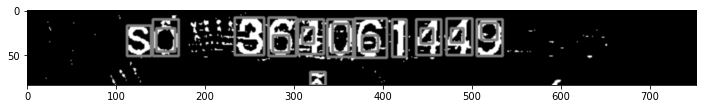

In [20]:
img = cv2.imread('test_cropping.png', 0)
_, thresh = cv2.threshold(img, 127, 255, 0)
img2, contours, hierarchy = cv2.findContours(thresh, 1, 2)
cnt_areas = len(contours) * [0]

for i in range(len(contours)):
    cnt_areas[i] = cv2.contourArea(contours[i])

cnt_idx = np.flipud(np.argsort(np.array(cnt_areas)))

for i in range(20):
    x,y,w,h = cv2.boundingRect(contours[cnt_idx[i]])
    cv2.rectangle(thresh, (x, y),(x + w, y + h), (127, 127, 127), 2)
plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')

In [61]:
from os import listdir

def extract_digits(filename):
    img = cv2.imread('id_number_combined/' + filename, 0)
    _, thresh = cv2.threshold(img, 127, 255, 0)
    img2, contours, hierarchy = cv2.findContours(thresh, 1, 2)
    print(len(contours))
    if (len(contours) > 0):
        cnt_areas = len(contours) * [0]

        for i in range(len(contours)):
            cnt_areas[i] = cv2.contourArea(contours[i])

        cnt_idx = np.flipud(np.argsort(np.array(cnt_areas)))

        if (len(contours) >= 20):
            length = 20
        else:
            length = len(contours)
        for i in range(length):
            x,y,w,h = cv2.boundingRect(contours[cnt_idx[i]])
            cv2.imwrite("digits/"+filename+"_"+str(i)+".png", img[y:y+h+1,x:x+w+1])

In [62]:
files = listdir('id_number_combined')
for file in files:
    # print(file)
    extract_digits(file)

91
75
228
34
39
0
47
91
32
141
40
60
130
268
42
90
31
182
61
38
146
30
351
268
42
42
135
153
28
19
45
30
103
110
57
107
101
43
165
197
25
0
90
43
5
26
62
39
26
46
18
41
32
70
483
44
65
46
70
42
49
44
32
27
84
24
52
27
86
59
108
30
24
72
117
34
85
22
26
112
45
11
149
174
89
0
67
8
38
55
81
40
42
75
130
79
54
48
45
71
19
15
81
98
32
31
166
35
383
399
125
48
182
43
48
43
10
164
225
46
60
95
0
157
22
19
34
50
27
25
24
0
24
42
39
41
73
72
73
52
41
47
39
129
48
28
205
21
169
16
74
43
99
31
67
67
26
67
22
79
34
34
100
220
40
20
34
74
20
49
383
6
147
58
35
77
69
158
56
44
47
67
180
40
39
20
45
34
107
26
42
65
30
41
50
80
35
27
41
154
24
111
96
21
42
127
24
23
47
52
19
52
27
168
19
101
73
30
39
33
25
158
0
112
21
71
192
25
130
21
39
60
65
39
25
44
45
130
132
104
105
26
47
63
59
83
67
26
44
27
49
26
42
38
81
21
45
46
85
78
30
89
8
72
25
40
49
5
27
50
52
122
81
18
0
107
31
119
26
26
19
175
38
27
192
19
22
29
17
89
15
63
130
0
35
106
33
122
84
163
96
27
27
23
97
26
92
55
60
26
81
72
33
27
36
24
95

In [55]:
extract_digits("test_cropping.png")

165
